# Visualization 

Python has a number of charting tools that can work hand in hand with pandas. The most popular is [matplotlib](http://matplotlib.org/). It isn't the prettiest thing in the world, but it offers some reasonably straightfoward tools for making quick charts. And, best of all, it can display right here in our Jupyter Notebook.

Before we start, we'll need to make sure matplotlib is installed. Return to your terminal and try installing it with our buddy pip, as we installed other things before.

```bash
    pip install matplotlib
```

Once you've got it in here, you can import it just as we would anything else. Though by adding the optional ``as`` option at the end we can create a shorter alias for accessing its tools.

In [1]:
import matplotlib.pyplot as plt

Before we'll get started, let's run one more trick to configure matplotlib to show its charts in our notebook.

In [2]:
%matplotlib inline

Now let's save the data we want to chart into a variable

In [7]:
import pandas as pd
contrib_list = pd.read_csv("contributions.csv")

,calaccess_committee_id,committee_name,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,BERGMAN,GRETCHEN,SPRING VALLEY,CA,91978,A NEW PATH,EXECUTIVE DIRECTOR,False,84.0
1,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,KAHLE,MYRNA,SAN DIEGO,CA,92109,NATIONAL SCHOOL DISTRICT,TEACHER,False,35.0
2,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-15,MCDEVITT,LEO,ESCONDIDO,CA,92025,LIFE IONIZERS,SEO/CONTENT MANAGER,False,198.0
3,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-08-10,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,False,-50.0
4,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-26,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,True,50.0


In [8]:
top_supporters = contrib_list.groupby(
    ["contributor_firstname", "contributor_lastname"]
)['amount'].sum().reset_index().sort_values("amount", ascending=False).head(10)

In [9]:
top_supporters

,contributor_firstname,contributor_lastname,amount
36156,THOMAS F.,STEYER,11400000.0
33779,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0
8685,DEAN A.,CORTOPASSI,2000000.0
33778,SEAN,PARKER,1900000.0
36094,THOMAS,STEYER,1750000.0
27738,NICHOLAS,MCKEOWN,1500000.0
17540,JOAN,CORTOPASSI,1500000.0
20280,JULIE,SCHAUER,1364000.0
7111,DANIEL,LEWIS,1250000.0
27740,NICHOLAS,PRITZKER,1250000.0


Making a quick bar chart is as easy as this.

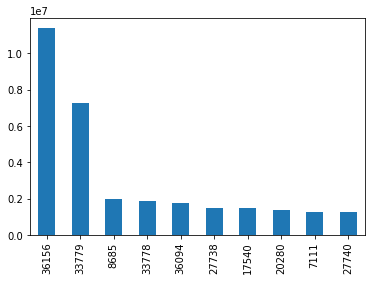

In [10]:
top_supporters['amount'].plot.bar()

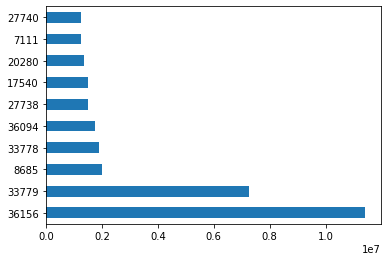

In [11]:
top_supporters['amount'].plot.barh()

It's really those first five that are the most interesting, so let's trim our chart.

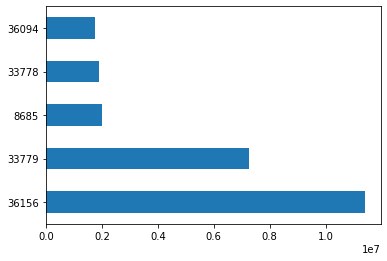

In [12]:
top_supporters.head(5)['amount'].plot.barh()

What are those y axis labels? Those are the row number (pandas calls them indexes) of each row. We don't want that. We want the names.

[Text(0, 0, 'STEYER'),
 Text(0, 0, 'PARKER AND AFFILIATED ENTITIES'),
 Text(0, 0, 'CORTOPASSI'),
 Text(0, 0, 'PARKER'),
 Text(0, 0, 'STEYER')]

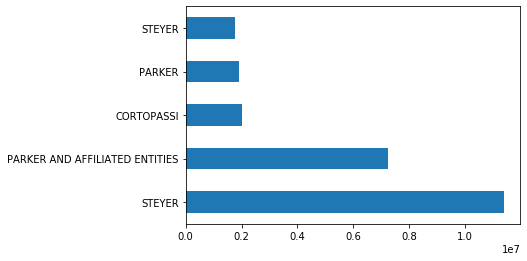

In [13]:
chart = top_supporters.head(5)['amount'].plot.barh()
chart.set_yticklabels(top_supporters['contributor_lastname'])

Okay, but what if I want to combine the first and last name?

First, make a new column. First let's look at what we have now.

In [14]:
top_supporters.head(5)

,contributor_firstname,contributor_lastname,amount
36156,THOMAS F.,STEYER,11400000.0
33779,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0
8685,DEAN A.,CORTOPASSI,2000000.0
33778,SEAN,PARKER,1900000.0
36094,THOMAS,STEYER,1750000.0


And guess what we can do the same thing with two columns in our table, and use a pandas trick that will apply it to every row.

In [17]:
top_supporters['full_name'] = top_supporters['contributor_firstname'] + " " + top_supporters['contributor_lastname']

Now let's see the results

In [18]:
top_supporters.head()

,contributor_firstname,contributor_lastname,amount,FULL_NAME,full_name
36156,THOMAS F.,STEYER,11400000.0,THOMAS F. STEYER,THOMAS F. STEYER
33779,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0,SEAN PARKER AND AFFILIATED ENTITIES,SEAN PARKER AND AFFILIATED ENTITIES
8685,DEAN A.,CORTOPASSI,2000000.0,DEAN A. CORTOPASSI,DEAN A. CORTOPASSI
33778,SEAN,PARKER,1900000.0,SEAN PARKER,SEAN PARKER
36094,THOMAS,STEYER,1750000.0,THOMAS STEYER,THOMAS STEYER


Now let's chart that.

[Text(0, 0, 'THOMAS F. STEYER'),
 Text(0, 0, 'SEAN PARKER AND AFFILIATED ENTITIES'),
 Text(0, 0, 'DEAN A. CORTOPASSI'),
 Text(0, 0, 'SEAN PARKER'),
 Text(0, 0, 'THOMAS STEYER')]

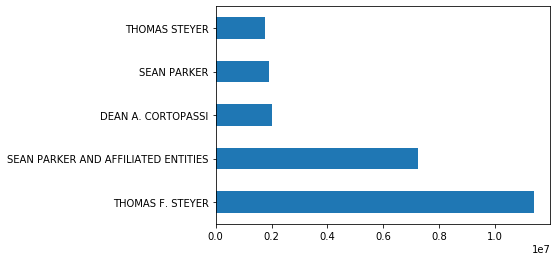

In [19]:
chart = top_supporters.head(5)['amount'].plot.barh()
chart.set_yticklabels(top_supporters['full_name'])

That's all well and good, but this chart is pretty ugly. If you wanted to hand this data off to your graphics department, or try your hand at a simple chart yourself using something like [Chartbuilder](https://quartz.github.io/Chartbuilder/), you'd need to export this data into a spreadsheet. 

It's this easy.

In [20]:
top_supporters.head(5).to_csv("top_supporters.csv")

And that's it. You've completed this class. If you want to keep working, try inventing your own questions to ask and answer with the database.